#### 1. Setup (Run Once)

In [ ]:
# from grids import create_257_cube_grid, create_128_cube_grid

# create_257_cube_grid()
# df = create_128_cube_grid()
# df

#### 2. Tidal Tensor Calculation (128 cube grid)

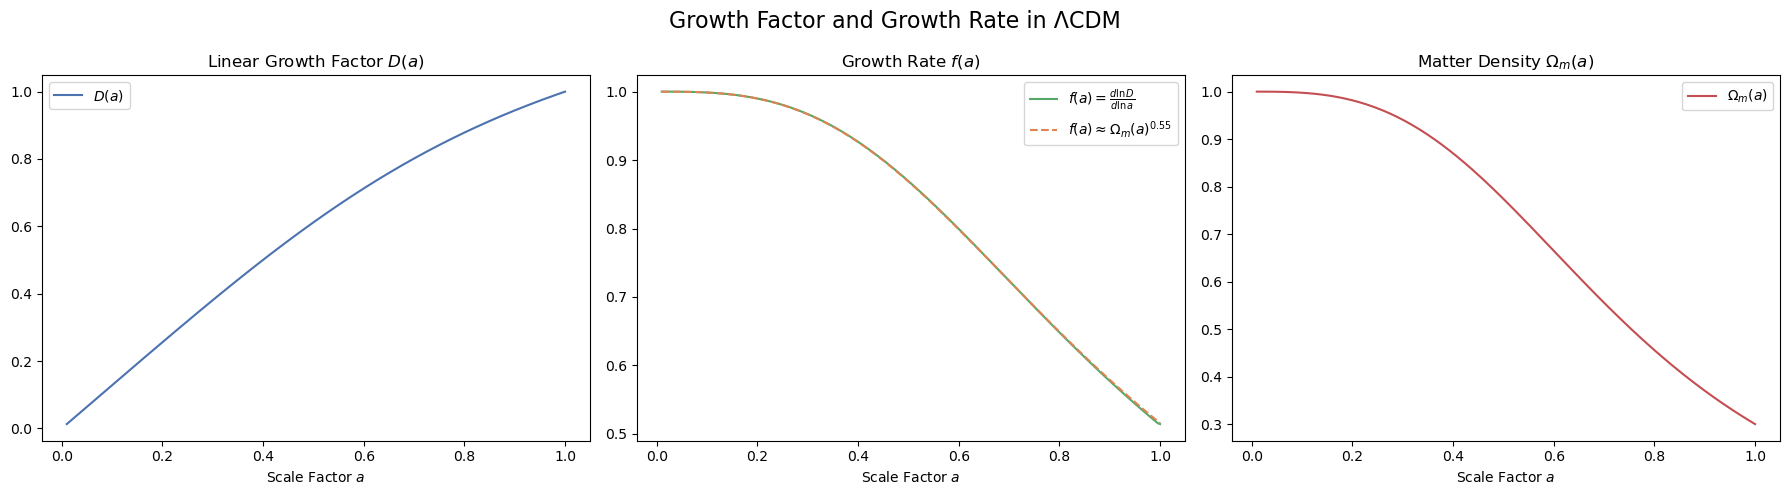

,GX,GY,GZ,Overdensity
0,-98.4375,-98.4375,-98.4375,-0.017161
1,-98.4375,-98.4375,-96.8750,-0.060969
2,-98.4375,-98.4375,-95.3125,-0.104996
3,-98.4375,-98.4375,-93.7500,-0.145409
4,-98.4375,-98.4375,-92.1875,-0.183655
...,...,...,...,...
2097147,100.0000,100.0000,93.7500,0.105601
2097148,100.0000,100.0000,95.3125,0.183807
2097149,100.0000,100.0000,96.8750,0.238035
2097150,100.0000,100.0000,98.4375,0.255083


In [3]:
import pandas as pd
from cosmological_helpers import plot_growth_quantities

plot_growth_quantities()
df = pd.read_csv('./Data/2M++Grids/128_cube_grid.csv')
df

In [2]:
df

,GX,GY,GZ,Overdensity
0,-98.4375,-98.4375,-98.4375,-0.017161
1,-98.4375,-98.4375,-96.8750,-0.060969
2,-98.4375,-98.4375,-95.3125,-0.104996
3,-98.4375,-98.4375,-93.7500,-0.145409
4,-98.4375,-98.4375,-92.1875,-0.183655
...,...,...,...,...
2097147,100.0000,100.0000,93.7500,0.105601
2097148,100.0000,100.0000,95.3125,0.183807
2097149,100.0000,100.0000,96.8750,0.238035
2097150,100.0000,100.0000,98.4375,0.255083
